In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display

np.random.seed(0)

df = pd.read_csv('/Users/macbook/Downloads/Dataset3.csv')
df.head()

,X1,X2,Y
0,25,6,0
1,69,37,1
2,41,22,0
3,68,69,0
4,79,54,1


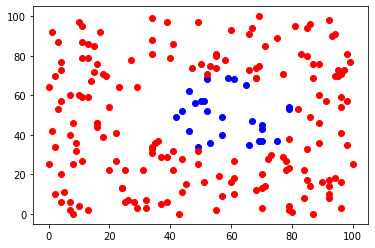

In [2]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
X3 = df["Y"].values.tolist()

for i in range(len(X3)):
    if X3[i] == 0:
        plt.plot(X1[i], X2[i], "ro")
    else:
        plt.plot(X1[i], X2[i], "bo")

In [3]:
X = np.zeros(shape=(len(X1),2))
Y = np.zeros(shape=(len(X1),1))

for i in range(len(X1)): 
    X[i] = [X1[i],X2[i]]
    Y[i] = [X3[i]]
#X
#Y

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 100
        outLayerNeurons = 1
        
        self.learning_rate = 0.01
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

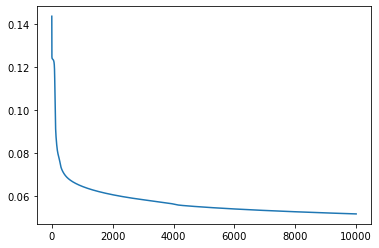

In [5]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)